# 7. 테스트 데이터 다루기

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import mglearn
import scipy
import os
%matplotlib inline

In [2]:
!tree -dL 2 ../data/aclimdb
# !find ../data -type d

../data/aclimdb
├── test
│   ├── neg
│   └── pos
└── train
    ├── neg
    └── pos

6 directories


In [3]:
from sklearn.datasets import load_files

reviews_train = load_files("../data/aclimdb/train")

In [4]:
reviews_train.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [5]:
text_train, y_train = reviews_train.data, reviews_train.target
print('text_train의 타입: {}'.format(type(text_train)))
print('text_train의 길이: {}'.format(len(text_train)))
print('text_train[6]: {}'.format(text_train[6]))

text_train의 타입: <class 'list'>
text_train의 길이: 25000
text_train[6]: b"This movie has a special way of telling the story, at first i found it rather odd as it jumped through time and I had no idea whats happening.<br /><br />Anyway the story line was although simple, but still very real and touching. You met someone the first time, you fell in love completely, but broke up at last and promoted a deadly agony. Who hasn't go through this? but we will never forget this kind of pain in our life. <br /><br />I would say i am rather touched as two actor has shown great performance in showing the love between the characters. I just wish that the story could be a happy ending."


In [6]:
text_train = [doc.replace(b"<br />", b" ") for doc in text_train]

In [7]:
text_train[6]

b"This movie has a special way of telling the story, at first i found it rather odd as it jumped through time and I had no idea whats happening.  Anyway the story line was although simple, but still very real and touching. You met someone the first time, you fell in love completely, but broke up at last and promoted a deadly agony. Who hasn't go through this? but we will never forget this kind of pain in our life.   I would say i am rather touched as two actor has shown great performance in showing the love between the characters. I just wish that the story could be a happy ending."

In [8]:
print('클래스별 샘플 수: {}'.format(np.bincount(y_train)))

클래스별 샘플 수: [12500 12500]


In [9]:
reviews_test = load_files('../data/aclimdb/test')
text_test, y_test = reviews_test.data, reviews_test.target
print('테스트 데이터의 문서 수: {}'.format(len(text_test)))
print('클래스별 샘플 수: {}'.format(np.bincount(y_test)))

테스트 데이터의 문서 수: 25000
클래스별 샘플 수: [12500 12500]


In [10]:
text_test = [doc.replace(b'<br />', b' ') for doc in text_test]
text_test[0]

b"Don't hate Heather Graham because she's beautiful, hate her because she's fun to watch in this movie. Like the hip clothing and funky surroundings, the actors in this flick work well together. Casey Affleck is hysterical and Heather Graham literally lights up the screen. The minor characters - Goran Visnjic {sigh} and Patricia Velazquez are as TALENTED as they are gorgeous. Congratulations Miramax & Director Lisa Krueger!"

In [11]:
bards_words = ["The fool doth think he is wise,",
              "but the wise man knows himself to be a fool"]

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
vect.fit(bards_words)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [13]:
print('어휘 사전의 크기: {}'.format(len(vect.vocabulary_)))
print('어휘 사전의 내용: {}'.format(vect.vocabulary_))

어휘 사전의 크기: 13
어휘 사전의 내용: {'the': 9, 'fool': 3, 'doth': 2, 'think': 10, 'he': 4, 'is': 6, 'wise': 12, 'but': 1, 'man': 8, 'knows': 7, 'himself': 5, 'to': 11, 'be': 0}


In [14]:
bag_of_words = vect.transform(bards_words)
print('BOW: {}'.format(bag_of_words))

BOW:   (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 6)	1
  (0, 9)	1
  (0, 10)	1
  (0, 12)	1
  (1, 0)	1
  (1, 1)	1
  (1, 3)	1
  (1, 5)	1
  (1, 7)	1
  (1, 8)	1
  (1, 9)	1
  (1, 11)	1
  (1, 12)	1


In [15]:
bag_of_words.toarray()

array([[0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1],
       [1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1]])

In [16]:
vect = CountVectorizer().fit(text_train)
X_train = vect.transform(text_train)
print('X_train:\n{}'.format(repr(X_train)))

X_train:
<25000x74849 sparse matrix of type '<class 'numpy.int64'>'
	with 3431196 stored elements in Compressed Sparse Row format>


In [17]:
feature_names = vect.get_feature_names()
print('특성 개수: {}'.format(len(feature_names)))
print('처음 20개 특성:\n{}'.format(feature_names[:20]))
print('20,010에서 20,030까지 특성:\n{}'.format(feature_names[20010:20030]))
print('매 2,000번째 특성:\n{}'.format(feature_names[::2000]))

특성 개수: 74849
처음 20개 특성:
['00', '000', '0000000000001', '00001', '00015', '000s', '001', '003830', '006', '007', '0079', '0080', '0083', '0093638', '00am', '00pm', '00s', '01', '01pm', '02']
20,010에서 20,030까지 특성:
['dratted', 'draub', 'draught', 'draughts', 'draughtswoman', 'draw', 'drawback', 'drawbacks', 'drawer', 'drawers', 'drawing', 'drawings', 'drawl', 'drawled', 'drawling', 'drawn', 'draws', 'draza', 'dre', 'drea']
매 2,000번째 특성:
['00', 'aesir', 'aquarian', 'barking', 'blustering', 'bête', 'chicanery', 'condensing', 'cunning', 'detox', 'draper', 'enshrined', 'favorit', 'freezer', 'goldman', 'hasan', 'huitieme', 'intelligible', 'kantrowitz', 'lawful', 'maars', 'megalunged', 'mostey', 'norrland', 'padilla', 'pincher', 'promisingly', 'receptionist', 'rivals', 'schnaas', 'shunning', 'sparse', 'subset', 'temptations', 'treatises', 'unproven', 'walkman', 'xylophonist']


In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
scores = cross_val_score(LogisticRegression(solver='liblinear', max_iter=10000), X_train, y_train, cv=5)
print('교차 검증 평균 점수: {:.2f}'.format(np.mean(scores)))

교차 검증 평균 점수: 0.88


In [19]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(LogisticRegression(solver='lbfgs', max_iter=10000), param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)
print('최상의 교차 검증 점수: {:.2f}'.format(grid.best_score_))
print('최적의 매개변수: {}'.format(grid.best_params_))

최상의 교차 검증 점수: 0.89
최적의 매개변수: {'C': 0.1}


In [20]:
X_test = vect.transform(text_test)
print('테스트 점수: {:.2f}'.format(grid.score(X_test, y_test)))

테스트 점수: 0.88


In [21]:
vect = CountVectorizer(min_df=5).fit(text_train)
X_train = vect.transform(text_train)
print('min_df=5로 제한한 X_train:\n{}'.format(repr(X_train)))

min_df=5로 제한한 X_train:
<25000x27271 sparse matrix of type '<class 'numpy.int64'>'
	with 3354014 stored elements in Compressed Sparse Row format>


In [22]:
feature_names = vect.get_feature_names()
print('처음 50개 특성:\n{}'.format(feature_names[:20]))
print('20,010에서 20,030까지 특성:\n{}'.format(feature_names[20010:20030]))
print('매 700번째 특성:\n{}'.format(feature_names[::700]))

처음 50개 특성:
['00', '000', '007', '00s', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '100', '1000', '100th', '101', '102', '103']
20,010에서 20,030까지 특성:
['repentance', 'repercussions', 'repertoire', 'repetition', 'repetitions', 'repetitious', 'repetitive', 'rephrase', 'replace', 'replaced', 'replacement', 'replaces', 'replacing', 'replay', 'replayable', 'replayed', 'replaying', 'replays', 'replete', 'replica']
매 700번째 특성:
['00', 'affections', 'appropriately', 'barbra', 'blurbs', 'butchered', 'cheese', 'commitment', 'courts', 'deconstructed', 'disgraceful', 'dvds', 'eschews', 'fell', 'freezer', 'goriest', 'hauser', 'hungary', 'insinuate', 'juggle', 'leering', 'maelstrom', 'messiah', 'music', 'occasional', 'parking', 'pleasantville', 'pronunciation', 'recipient', 'reviews', 'sas', 'shea', 'sneers', 'steiger', 'swastika', 'thrusting', 'tvs', 'vampyre', 'westerns']


In [23]:
grid = GridSearchCV(LogisticRegression(solver='lbfgs', max_iter=10000), param_grid, cv=5)
grid.fit(X_train, y_train)
print('최상의 교차 검증 점수: {:.2f}'.format(grid.best_score_))

최상의 교차 검증 점수: 0.89


In [24]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
print('불용어 개수: {}'.format(len(ENGLISH_STOP_WORDS)))
print('매 10번째 불용어:\n{}'.format(list(ENGLISH_STOP_WORDS)[::10]))

불용어 개수: 318
매 10번째 불용어:
['hundred', 'such', 'has', 'became', 'per', 'of', 'last', 'herself', 'upon', 'find', 'bottom', 'get', 'once', 'somehow', 'give', 'may', 'have', 'against', 'otherwise', 'do', 'latterly', 'where', 'your', 'after', 'ltd', 'please', 'itself', 'three', 'beyond', 'less', 'couldnt', 'ourselves']


In [25]:
vect = CountVectorizer(min_df=5, stop_words='english').fit(text_train)
X_train = vect.transform(text_train)
print('불용어가 제거된 X_train:\n{}'.format(repr(X_train)))

불용어가 제거된 X_train:
<25000x26966 sparse matrix of type '<class 'numpy.int64'>'
	with 2149958 stored elements in Compressed Sparse Row format>


In [26]:
grid = GridSearchCV(LogisticRegression(solver='lbfgs', max_iter=10000), param_grid, cv=5)
grid.fit(X_train, y_train)
print('최상의 교차 검증 점수: {:.2f}'.format(grid.best_score_))

최상의 교차 검증 점수: 0.88


In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(TfidfVectorizer(min_df=5), LogisticRegression(solver='lbfgs', max_iter=10000))
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1)
grid.fit(text_train, y_train)
print('최상의 교차 검증 점수: {:.2f}'.format(grid.best_score_))

최상의 교차 검증 점수: 0.89


In [28]:
vectorizer = grid.best_estimator_.named_steps['tfidfvectorizer']
X_train = vectorizer.transform(text_train)

In [29]:
type(X_train)         # tf_idf 값 scipy 희소행렬

scipy.sparse.csr.csr_matrix

In [30]:
max_value = X_train.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()
feature_names = np.array(vectorizer.get_feature_names())

print('tfidf가 가장 낮은 특성 20개:\n{}'.format(feature_names[sorted_by_tfidf[:20]]))
print('tfidf가 가장 높은 특성 20개:\n{}'.format(feature_names[sorted_by_tfidf[-20:]]))

tfidf가 가장 낮은 특성 20개:
['suplexes' 'gauche' 'hypocrites' 'oncoming' 'songwriting' 'galadriel'
 'emerald' 'mclaughlin' 'sylvain' 'oversee' 'cataclysmic' 'pressuring'
 'uphold' 'thieving' 'inconsiderate' 'ware' 'denim' 'reverting' 'booed'
 'spacious']
tfidf가 가장 높은 특성 20개:
['gadget' 'sucks' 'zatoichi' 'demons' 'lennon' 'bye' 'dev' 'weller'
 'sasquatch' 'botched' 'xica' 'darkman' 'woo' 'casper' 'doodlebops'
 'smallville' 'wei' 'scanners' 'steve' 'pokemon']


In [31]:
sorted_by_idf = np.argsort(vectorizer.idf_)
print('idf가 가장 낮은 특성 100개:\n{}'.format(feature_names[sorted_by_idf[:100]]))

idf가 가장 낮은 특성 100개:
['the' 'and' 'of' 'to' 'this' 'is' 'it' 'in' 'that' 'but' 'for' 'with'
 'was' 'as' 'on' 'movie' 'not' 'have' 'one' 'be' 'film' 'are' 'you' 'all'
 'at' 'an' 'by' 'so' 'from' 'like' 'who' 'they' 'there' 'if' 'his' 'out'
 'just' 'about' 'he' 'or' 'has' 'what' 'some' 'good' 'can' 'more' 'when'
 'time' 'up' 'very' 'even' 'only' 'no' 'would' 'my' 'see' 'really' 'story'
 'which' 'well' 'had' 'me' 'than' 'much' 'their' 'get' 'were' 'other'
 'been' 'do' 'most' 'don' 'her' 'also' 'into' 'first' 'made' 'how' 'great'
 'because' 'will' 'people' 'make' 'way' 'could' 'we' 'bad' 'after' 'any'
 'too' 'then' 'them' 'she' 'watch' 'think' 'acting' 'movies' 'seen' 'its'
 'him']


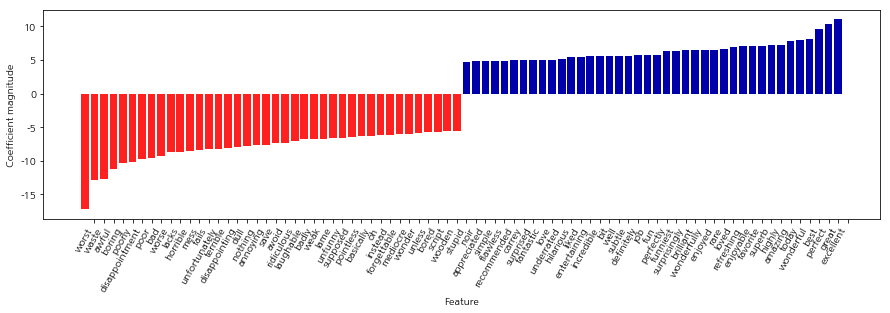

In [32]:
mglearn.tools.visualize_coefficients(grid.best_estimator_.named_steps['logisticregression'].coef_[0], 
                                     feature_names, n_top_features=40)

In [33]:
print('bards_words:\n{}'.format(bards_words))

bards_words:
['The fool doth think he is wise,', 'but the wise man knows himself to be a fool']


In [34]:
cv = CountVectorizer(ngram_range=(1,1)).fit(bards_words)
print('어휘 사전 크기: {}'.format(len(cv.vocabulary_)))
print('어휘 사전:\n{}'.format(cv.get_feature_names()))

어휘 사전 크기: 13
어휘 사전:
['be', 'but', 'doth', 'fool', 'he', 'himself', 'is', 'knows', 'man', 'the', 'think', 'to', 'wise']


In [35]:
cv = CountVectorizer(ngram_range=(2,2)).fit(bards_words)
print('어휘 사전 크기: {}'.format(len(cv.vocabulary_)))
print('어휘 사전:\n{}'.format(cv.get_feature_names()))

어휘 사전 크기: 14
어휘 사전:
['be fool', 'but the', 'doth think', 'fool doth', 'he is', 'himself to', 'is wise', 'knows himself', 'man knows', 'the fool', 'the wise', 'think he', 'to be', 'wise man']


In [36]:
print('변환된 데이터(밀집배열):\n{}'.format(cv.transform(bards_words).toarray()))

변환된 데이터(밀집배열):
[[0 0 1 1 1 0 1 0 0 1 0 1 0 0]
 [1 1 0 0 0 1 0 1 1 0 1 0 1 1]]


In [37]:
cv = CountVectorizer(ngram_range=(1,3)).fit(bards_words)
print('어휘 사전 크기: {}'.format(len(cv.vocabulary_)))
print('어휘 사전:\n{}'.format(cv.get_feature_names()))

어휘 사전 크기: 39
어휘 사전:
['be', 'be fool', 'but', 'but the', 'but the wise', 'doth', 'doth think', 'doth think he', 'fool', 'fool doth', 'fool doth think', 'he', 'he is', 'he is wise', 'himself', 'himself to', 'himself to be', 'is', 'is wise', 'knows', 'knows himself', 'knows himself to', 'man', 'man knows', 'man knows himself', 'the', 'the fool', 'the fool doth', 'the wise', 'the wise man', 'think', 'think he', 'think he is', 'to', 'to be', 'to be fool', 'wise', 'wise man', 'wise man knows']


In [38]:
pipe = make_pipeline(TfidfVectorizer(min_df=5), LogisticRegression(solver='liblinear', max_iter=1000))
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100],
             'tfidfvectorizer__ngram_range': [(1,1), (1,2), (1,3)]}

grid = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1)
grid.fit(text_train, y_train)
print('최상의 교차 검증 점수: {:.2f}'.format(grid.best_score_))
print('최적의 매개 변수: {}'.format(grid.best_params_))

최상의 교차 검증 점수: 0.91
최적의 매개 변수: {'logisticregression__C': 100, 'tfidfvectorizer__ngram_range': (1, 3)}


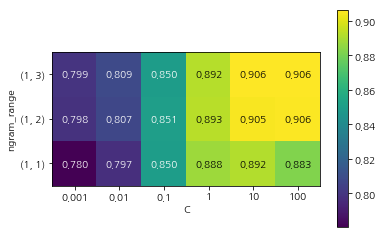

In [39]:
scores = grid.cv_results_['mean_test_score'].reshape(-1, 3).T

heatmap = mglearn.tools.heatmap(scores, xlabel='C', ylabel='ngram_range', cmap='viridis', fmt='%.3f',
                               xticklabels=param_grid['logisticregression__C'], yticklabels=param_grid['tfidfvectorizer__ngram_range'])
plt.colorbar(heatmap)

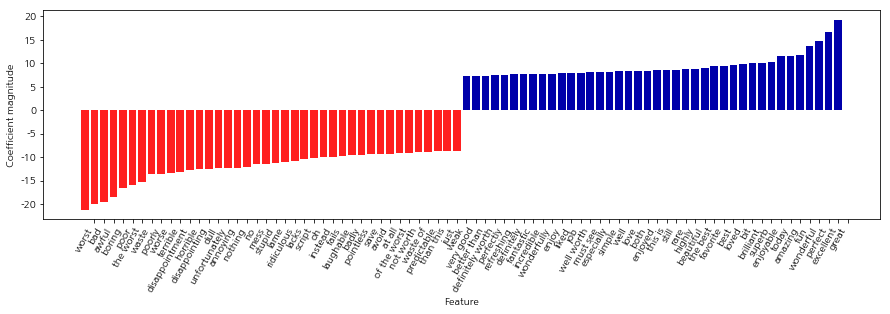

In [40]:
vect = grid.best_estimator_.named_steps['tfidfvectorizer']
feature_names = np.array(vect.get_feature_names())
coef = grid.best_estimator_.named_steps['logisticregression'].coef_
mglearn.tools.visualize_coefficients(coef, feature_names, n_top_features=40)

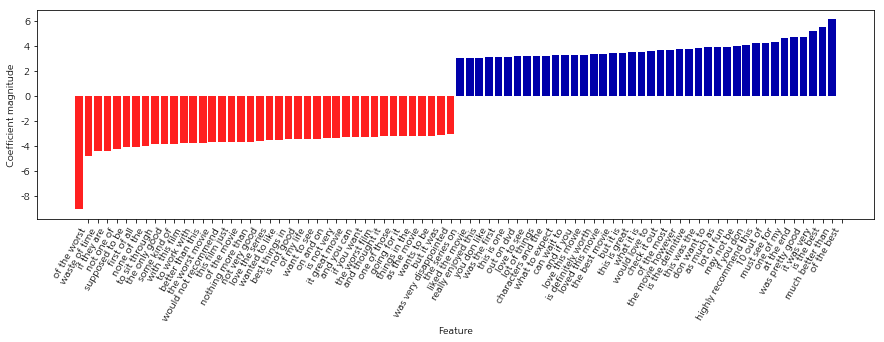

In [41]:
mask = np.array([len(feature.split(" ")) for feature in feature_names]) == 3
mglearn.tools.visualize_coefficients(coef.ravel()[mask], feature_names[mask], n_top_features=40)

In [42]:
import spacy
import nltk

en_nlp = spacy.load('en')
stemmer = nltk.stem.PorterStemmer()

def compare_normalization(doc):
    doc_spacy = en_nlp(doc)
    print('표제어:')
    print([token.lemma_ for token in doc_spacy])
    print('어간:')
    print([stemmer.stem(token.norm_.lower()) for token in doc_spacy])
    
compare_normalization(u"Our meeting today was worse than yesterday, "
                      "I'm scared of meeting the clients tomorrow.")

표제어:
['-PRON-', 'meeting', 'today', 'be', 'bad', 'than', 'yesterday', ',', '-PRON-', 'be', 'scared', 'of', 'meet', 'the', 'client', 'tomorrow', '.']
어간:
['our', 'meet', 'today', 'wa', 'wors', 'than', 'yesterday', ',', 'i', 'am', 'scare', 'of', 'meet', 'the', 'client', 'tomorrow', '.']


In [43]:
import re

regexp = re.compile('(?u)\\b\\w\\w+\\b')

en_nlp = spacy.load('en')

def custom_tokenizer(document):
    from spacy.tokens import Doc
    doc = Doc(en_nlp.vocab, words=regexp.findall(document))
    return [token.lemma_ for token in doc]

lemma_vect = CountVectorizer(tokenizer=custom_tokenizer, min_df=5)

In [44]:
X_train_lemma = lemma_vect.fit_transform(text_train)
print('X_train_lemma.shape: {}'.format(X_train_lemma.shape))

vect = CountVectorizer(min_df=5).fit(text_train)
X_train = vect.transform(text_train)
print('X_train.shape: {}'.format(X_train.shape))

X_train_lemma.shape: (25000, 20660)
X_train.shape: (25000, 27271)


In [45]:
from sklearn.model_selection import StratifiedShuffleSplit

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.99, train_size=0.01, random_state=0)
grid = GridSearchCV(LogisticRegression(solver='liblinear', max_iter=500), param_grid, cv=cv)

grid.fit(X_train, y_train)
print('최상의 교차 검증 점수 (기본 CountVectoerizer): {:.3f}'.format(grid.best_score_))

grid.fit(X_train_lemma, y_train)
print('최상의 교차 검증 점수 (표제어): {:.3f})'.format(grid.best_score_))

최상의 교차 검증 점수 (기본 CountVectoerizer): 0.721
최상의 교차 검증 점수 (표제어): 0.729)


In [46]:
vect = CountVectorizer(max_features=1000, max_df=.15)
X = vect.fit_transform(text_train)

In [47]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=10, learning_method='batch', max_iter=25, random_state=0)
document_topics10 = lda.fit_transform(X)

In [48]:
print('lda.components_.shape: {}'.format(lda.components_.shape))

lda.components_.shape: (10, 1000)


In [49]:
sorting = np.argsort(lda.components_, axis=1)[:, ::-1]
feature_names = np.array(vect.get_feature_names())
mglearn.tools.print_topics(topics=range(10), feature_names=feature_names, sorting=sorting, topics_per_chunk=5, n_words=10)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
worst         us            director      role          action        
nothing       our           work          performance   game          
thing         world         quite         young         fight         
didn          years         interesting   cast          war           
actors        now           seems         father        japanese      
script        day           however       john          hero          
minutes       family        camera        plays         team          
awful         own           though        played        match         
actually      war           art           actor         battle        
waste         before        audience      wife          fighting      


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      --------      --------      
seri

In [50]:
lda100 = LatentDirichletAllocation(n_components=100, learning_method='batch', max_iter=25, random_state=0)
document_topics100 = lda100.fit_transform(X)

In [51]:
topics = np.array([7, 16, 24, 25, 28, 36, 37, 41, 45, 51, 53, 54, 63, 89, 97])
sorting = np.argsort(lda100.components_, axis=1)[:, ::-1]
feature_names = np.array(vect.get_feature_names())
mglearn.tools.print_topics(topics=topics, feature_names=feature_names,
                          sorting=sorting, topics_per_chunk=5, n_words=20)

topic 7       topic 16      topic 24      topic 25      topic 28      
--------      --------      --------      --------      --------      
version       american      hero          budget        part          
tale          greatest      cat           low           second        
classic       america       away          production    third         
german        number        fire          cheap         sequel        
modern        became        control       actors        parts         
filmed        culture       now           shot          different     
cut           history       runs          flick         three         
production    three         outside       obviously     another       
television    today         takes         quality       least         
sets          popular       himself       video         same          
period        among         head          big           last          
under         day           gets          decent        doesn         
hold  

In [52]:
music = np.argsort(document_topics100[:, 45])[::-1]
for i in music[:10]:
    print(b".".join(text_train[i].split(b".")[:2]) + b".\n")

b'I think the opening 20 minutes of this film is perhaps one of the most exciting filmed, with the brilliant music score working to build tension to a shattering climax. What cinema goers made of this in the 30s, I can only imagine.\n'
b'The movie celebrates life.  The world is setting itself for the innocent and the pure souls and everything has "Happy End", just like in the closing scene of the movie.\n'
b'The pros of this film are the astonishing fighting scenes - absolutely incredible sword-moves and martial art show off. A true John Woo masterpiece.\n'
b"along with it's partner, this is the greatest piece of animation ever created. the images and styles are amazing, and match perfectly with the story which is a brilliantly realistic reinterpretation of our own world, where is has been, and where it could go.\n"
b'To sat how awful The Shield is, you\'d have to write pages and pages, so suffice it to say that it is a monument to bad directing.  "When Directors Go Awry" should have b

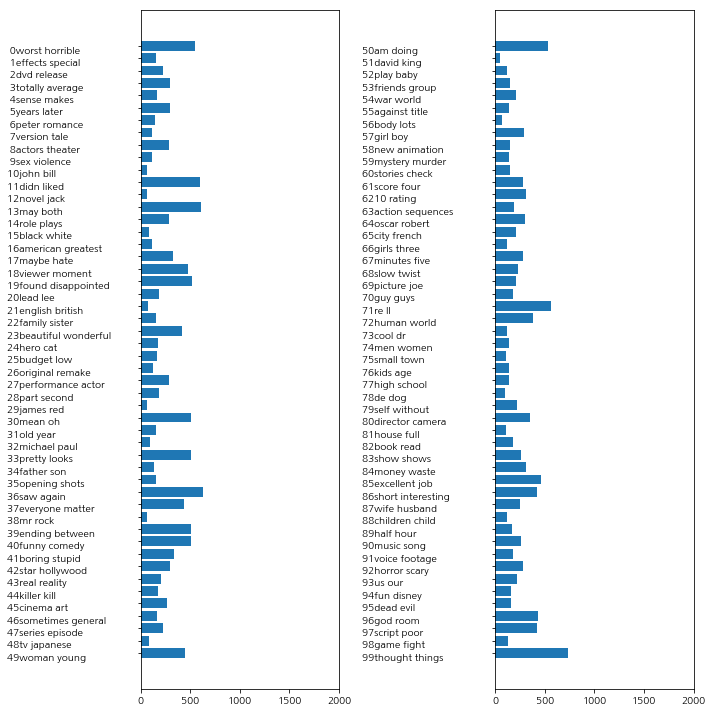

In [53]:
fig, ax = plt.subplots(1, 2, figsize=(10,10))
topic_names = ["{:>2}".format(i) + " ".join(words) 
              for i, words in enumerate(feature_names[sorting[:, :2]])]

for col in [0, 1]:
    start = col * 50
    end = (col + 1) * 50
    ax[col].barh(np.arange(50), np.sum(document_topics100, axis=0)[start:end])
    ax[col].set_yticks(np.arange(50))
    ax[col].set_yticklabels(topic_names[start:end], ha='left', va='top')
    ax[col].invert_yaxis()
    ax[col].set_xlim(0, 2000)
    yax = ax[col].get_yaxis()
    yax.set_tick_params(pad=130)
plt.tight_layout()